In [23]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import torch.optim as optim
#from torch.utils.tensorboard import SummaryWriter

from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, Theta
from darts.metrics import mape, rmse, r2_score
from darts.utils.statistics import check_seasonality, plot_acf
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import SunspotsDataset, AirPassengersDataset

import sys
import time
import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

FC_N = 36               # forecast periods
FC_STRIDE = 10
FC_START = "19590101"   # period at which to split training and validation dataset

In [24]:
EPOCH = 3       # for testing or debugging, rather than real forecasts, 
                  # set EPOCH to a low value like 3; for the real deal: 300 
                  # 300 will take as much as 30 - 50 minutes of processing time

In [25]:
path='/home/sairam/projects/evv2gsimulation/program/evv2gsim/FrequencyGenerator/FrequencyData/FrequencyData.csv'

freqdata= pd.read_csv(path, index_col=0)
freqdata_series= freqdata['Frequency']
freqdata.head(10)



,Frequency
2020-01-01 00:00:00,50.000233
2020-01-01 00:00:01,50.025000
2020-01-01 00:00:02,50.024000
2020-01-01 00:00:03,50.023000
2020-01-01 00:00:04,50.022000
2020-01-01 00:00:05,50.020000
2020-01-01 00:00:06,50.018000
2020-01-01 00:00:07,50.015000
2020-01-01 00:00:08,50.013000
2020-01-01 00:00:09,50.012000


In [26]:
freqdata_series.describe()

count    2.678400e+06
mean     5.000023e+01
std      1.839557e-02
min      4.988500e+01
25%      4.998900e+01
50%      5.000023e+01
75%      5.001200e+01
max      5.015800e+01
Name: Frequency, dtype: float64

<Axes: >

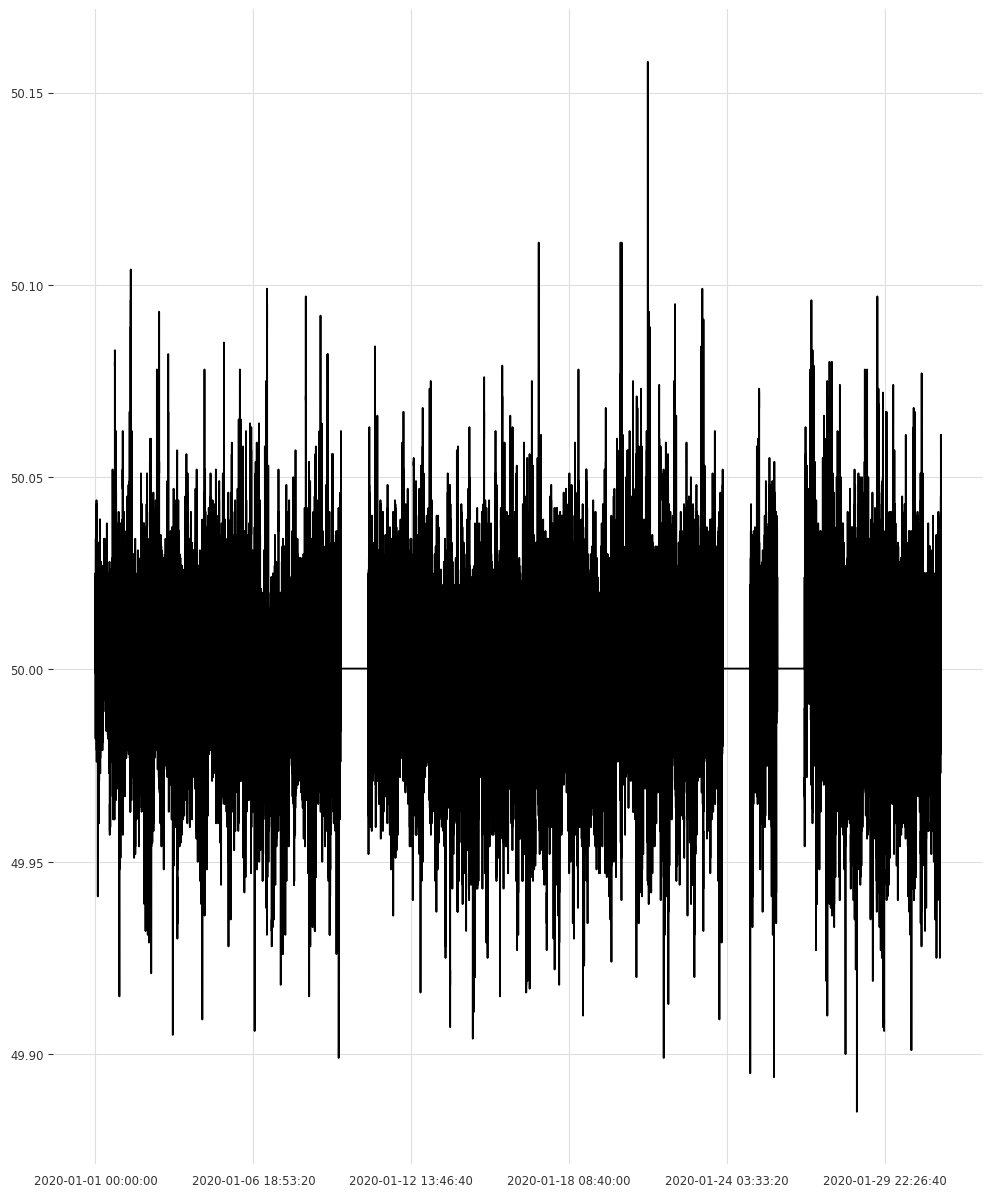

In [27]:
plt.figure(100, figsize=(12,15))
freqdata_series.plot()

In [36]:
from darts import TimeSeries
ts = TimeSeries.from_series(freqdata)
type(ts)

ValueError: If time_col is not specified, the DataFrame must be indexed either with a DatetimeIndex, a RangeIndex, or an integer Index that can be converted into a RangeIndex

In [31]:
# analyze its seasonality
from darts import TimeSeries
#ts = TimeSeries.from_series(freqdata)

is_seasonal, periodicity = check_seasonality(freqdata_series, max_lag=len(freqdata_series))
dict_seas ={
    "is seasonal?":is_seasonal, 
    "periodicity (months)":f'{periodicity:.1f}', 
    "periodicity (~years)": f'{periodicity/12:.1f}'}
_ = [print(k,":",v) for k,v in dict_seas.items()]

AttributeError: 'Series' object has no attribute '_assert_univariate'